In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import and split data
dx, dy = load_breast_cancer(return_X_y=True)
dx_std = StandardScaler().fit_transform(dx)
dx_train, dx_test, dy_train, dy_test = train_test_split(dx_std, dy, test_size=0.2, random_state=100)

In [3]:
#check the data
print([[x,y] for x, y in zip(dx_train[0:5], dy_train[0:5])])

[[array([-0.30596615,  0.00473593, -0.38550046, -0.36316091, -1.12158738,
       -1.25934446, -1.1061848 , -1.15433606,  0.02694897, -1.10397473,
       -0.0042302 , -0.0051771 , -0.13418261, -0.16230835,  0.15001311,
       -0.94370263, -1.03455602, -1.23751977,  0.16438843, -0.30445597,
       -0.42228058, -0.55810202, -0.50699109, -0.45087495, -1.3268508 ,
       -1.22364683, -1.29697922, -1.57589532, -0.74701944, -1.16682532]), 1], [array([-0.35424856,  2.24104744, -0.39003138, -0.39984984, -1.07675315,
       -0.87368185, -0.33709238, -0.65746658, -0.89673971, -0.81053069,
       -0.6986422 ,  0.25971711, -0.67525107, -0.51719593,  0.45702556,
       -0.22065966,  0.23496007, -0.6774098 , -0.43495016, -0.37594547,
       -0.49268864,  1.63866073, -0.54869126, -0.50079967, -0.42383144,
       -0.58693459, -0.13571466, -0.75639985, -0.85541074, -0.63871258]), 1], [array([ 0.46087218, -0.01620767,  0.62324754,  0.29496443,  1.98834244,
        2.50271372,  2.54364574,  1.94179302,  2

In [4]:
#KNN modeling
knn_param_grid = {'n_neighbors':np.arange(20) + 1}
knn_model = GridSearchCV(KNeighborsClassifier(), knn_param_grid)
knn_model.fit(dx_train, dy_train)

print('Best params:', knn_model.best_params_)
print('CV score:', knn_model.best_score_.round(3))
print('Test score:', knn_model.score(dx_test, dy_test).round(3))

Best params: {'n_neighbors': 7}
CV score: 0.967
Test score: 0.956


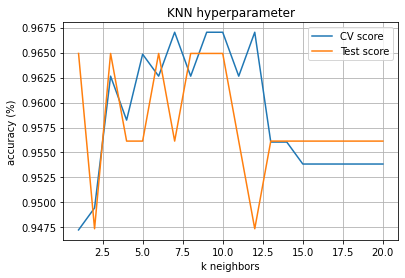

In [5]:
#KNN modeling(test n_neighbors from 1 to 20)
knn_cv_scores = []
knn_test_scores =[]
number_of_neighbors = np.arange(20)+1

for k in number_of_neighbors:
    knn = KNeighborsClassifier(n_neighbors=k).fit(dx_train, dy_train)
    knn_cv_scores.append(cross_val_score(knn, dx_train, dy_train, cv=5).mean())
    knn_test_scores.append(knn.score(dx_test, dy_test))
    
plt.title('KNN hyperparameter')
plt.plot(number_of_neighbors, knn_cv_scores, label='CV score')
plt.plot(number_of_neighbors, knn_test_scores, label='Test score')
plt.xlabel('k neighbors')
plt.ylabel('accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
#Testing of KNN model
knn_predictions = knn_model.predict(dx_test[:10])
print('Dataset:    ', dy_test[:10])
print('Predictions:', knn_predictions)

Dataset:     [0 1 0 1 1 1 0 0 0 1]
Predictions: [0 1 0 1 1 1 0 0 1 1]
